In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("/content/drive/MyDrive/jena_climate_2009_2016.csv",index_col=["Date Time"])

In [3]:
data.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420551 entries, 01.01.2009 00:10:00 to 01.01.2017 00:00:00
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   p (mbar)         420551 non-null  float64
 1   T (degC)         420551 non-null  float64
 2   Tpot (K)         420551 non-null  float64
 3   Tdew (degC)      420551 non-null  float64
 4   rh (%)           420551 non-null  float64
 5   VPmax (mbar)     420551 non-null  float64
 6   VPact (mbar)     420551 non-null  float64
 7   VPdef (mbar)     420551 non-null  float64
 8   sh (g/kg)        420551 non-null  float64
 9   H2OC (mmol/mol)  420551 non-null  float64
 10  rho (g/m**3)     420551 non-null  float64
 11  wv (m/s)         420551 non-null  float64
 12  max. wv (m/s)    420551 non-null  float64
 13  wd (deg)         420551 non-null  float64
dtypes: float64(14)
memory usage: 48.1+ MB


In [5]:
data.describe()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
count,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000
mean,989.212776,9.450147,283.492743,4.955854,76.008259,13.576251,9.533756,4.042412,6.022408,9.640223,1216.062748,1.702224,3.056555,174.743738
std,8.358481,8.423365,8.504471,6.730674,16.476175,7.739020,4.184164,4.896851,2.656139,4.235395,39.975208,65.446714,69.016932,86.681693
min,913.600000,-23.010000,250.600000,-25.010000,12.950000,0.950000,0.790000,0.000000,0.500000,0.800000,1059.450000,-9999.000000,-9999.000000,0.000000
25%,984.200000,3.360000,277.430000,0.240000,65.210000,7.780000,6.210000,0.870000,3.920000,6.290000,1187.490000,0.990000,1.760000,124.900000
50%,989.580000,9.420000,283.470000,5.220000,79.300000,11.820000,8.860000,2.190000,5.590000,8.960000,1213.790000,1.760000,2.960000,198.100000
75%,994.720000,15.470000,289.530000,10.070000,89.400000,17.600000,12.350000,5.300000,7.800000,12.490000,1242.770000,2.860000,4.740000,234.100000
max,1015.350000,37.280000,311.340000,23.110000,100.000000,63.770000,28.320000,46.010000,18.130000,28.820000,1393.540000,28.490000,23.500000,360.000000


In [6]:
data.columns

Index(['p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)', 'rh (%)',
       'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)'],
      dtype='object')

In [7]:
tempc=data["T (degC)"]
var=data.drop(columns=["T (degC)","Tpot (K)"])

In [8]:
tempc

,T (degC)
Date Time,
01.01.2009 00:10:00,-8.02
01.01.2009 00:20:00,-8.41
01.01.2009 00:30:00,-8.51
01.01.2009 00:40:00,-8.31
01.01.2009 00:50:00,-8.27
...,...
31.12.2016 23:20:00,-4.05
31.12.2016 23:30:00,-3.35
31.12.2016 23:40:00,-3.16


In [9]:
var

,p (mbar),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,
01.01.2009 00:10:00,996.52,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
01.01.2009 00:20:00,996.57,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
01.01.2009 00:30:00,996.53,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
01.01.2009 00:40:00,996.51,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
01.01.2009 00:50:00,996.51,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...
31.12.2016 23:20:00,1000.07,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
31.12.2016 23:30:00,999.93,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
31.12.2016 23:40:00,999.82,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2


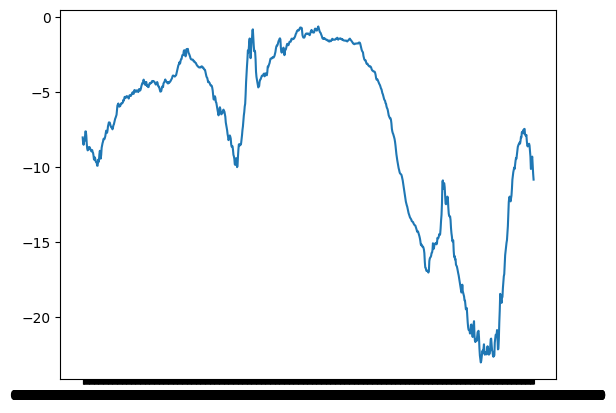

In [10]:
plt.plot(tempc[:1000])

In [11]:
data.isna().sum()

,0
p (mbar),0
T (degC),0
Tpot (K),0
Tdew (degC),0
rh (%),0
VPmax (mbar),0
VPact (mbar),0
VPdef (mbar),0
sh (g/kg),0
H2OC (mmol/mol),0


In [12]:
data.index=pd.to_datetime(data.index,format="%d.%m.%Y %H:%M:%S")

In [13]:
data=data[(data.index.minute==0)&(data.index.hour%3==0)]

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler=StandardScaler()

In [16]:
var=scaler.fit_transform(var)

In [17]:
seq_len=56
step=2

In [18]:
sequences=[]
targets=[]
for i in range(0,len(data)-seq_len-7,step):
   seq=var[i:i+seq_len]
   target=tempc[i+seq_len+7]
   sequences.append(seq)
   targets.append(target)
sequences,targets=np.array(sequences),np.array(targets)

<ipython-input-18-2253011573>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  target=tempc[i+seq_len+7]


In [19]:
sequences.shape

(11650, 56, 12)

In [20]:
x_train,x_val,x_test=sequences[:8000],sequences[8000:9500],sequences[9500:]

In [21]:
y_train,y_val,y_test=targets[:8000],targets[8000:9500],targets[9500:]

In [22]:
import tensorflow as tf
from tensorflow.keras.layers import GRU,Dense,Dropout
from tensorflow.keras.models import Sequential

In [23]:
model=Sequential()

model.add(GRU(units=128,activation="tanh",recurrent_dropout=0.3,input_shape=(56,12),return_sequences=True))
model.add(GRU(units=128,activation="tanh",recurrent_dropout=0.3,dropout=0.3))
model.add(Dropout(0.5))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1,activation="linear"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 56, 128)        │        54,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 128)            │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 170,241 (665.00 KB)

 Trainable params: 170,241 (665.00 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
opt=tf.optimizers.Adam(learning_rate=0.001)
loss=tf.losses.MeanAbsoluteError()
model.compile(optimizer=opt,loss=loss)

In [26]:
x_train.shape

(8000, 56, 12)

In [27]:
y_train.shape

(8000,)

In [28]:
model.fit(x_train,y_train,batch_size=50,epochs=20,validation_data=(x_val,y_val),verbose=2)

Epoch 1/20
160/160 - 27s - 167ms/step - loss: 2.3934 - val_loss: 1.3664
Epoch 2/20
160/160 - 22s - 137ms/step - loss: 1.4422 - val_loss: 1.0175
Epoch 3/20
160/160 - 41s - 255ms/step - loss: 1.3279 - val_loss: 1.0623
Epoch 4/20
160/160 - 41s - 256ms/step - loss: 1.3002 - val_loss: 0.9460
Epoch 5/20
160/160 - 42s - 260ms/step - loss: 1.2616 - val_loss: 1.3616
Epoch 6/20
160/160 - 22s - 138ms/step - loss: 1.2290 - val_loss: 0.8988
Epoch 7/20
160/160 - 22s - 136ms/step - loss: 1.2219 - val_loss: 0.9322
Epoch 8/20
160/160 - 21s - 130ms/step - loss: 1.1827 - val_loss: 0.8473
Epoch 9/20
160/160 - 43s - 267ms/step - loss: 1.1985 - val_loss: 0.8721
Epoch 10/20
160/160 - 40s - 250ms/step - loss: 1.1628 - val_loss: 1.1964
Epoch 11/20
160/160 - 22s - 140ms/step - loss: 1.1599 - val_loss: 1.0265
Epoch 12/20
160/160 - 41s - 255ms/step - loss: 1.1355 - val_loss: 0.8654
Epoch 13/20
160/160 - 41s - 254ms/step - loss: 1.1418 - val_loss: 0.9187
Epoch 14/20
160/160 - 22s - 140ms/step - loss: 1.1323 - val_

In [30]:
model.evaluate(x_test,y_test)

68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 1.5644


1.5593153238296509